# Q8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

If we define $v_x=\dot{x}$, and $v_y=\dot{y}$
We will have:

$$\frac{dx}{dt}=v_x$$
$$\frac{d(v_x)}{dt}=-\frac{GMx}{r^3}$$
$$\frac{dy}{dt}=v_y$$
$$\frac{d(v_y)}{dt}=-\frac{GMy}{r^3}$$

In [5]:
def funcx(vec, t):
    x=vec[0]
    y=vec[1]
    x1=vec[2]
    y1=vec[3]
    return x1

def funcy(vec, t):
    x=vec[0]
    y=vec[1]
    x1=vec[2]
    y1=vec[3]
    return y1

def funcx1(vec, t):
    x=vec[0]
    y=vec[1]
    x1=vec[2]
    y1=vec[3]
    r=math.sqrt(x**2+y**2)
    return -(G*M*x)/r**3

def funcy1(vec, t):
    x=vec[0]
    y=vec[1]
    x1=vec[2]
    y1=vec[3]
    r=math.sqrt(x**2+y**2)
    return -(G*M*y)/r**3

def func(vec,t):
    return np.array([funcx(vec,t), funcy(vec, t), funcx1(vec,t), funcy1(vec, t)])

In [6]:
def RK_4(x, t, func, h):
    f=func(x,t)
    k1=h*f
    k2=h*func(x+k1/2, t+h/2)
    k3=h*func(x+k2/2, t+h/2)
    k4=h*func(x+k3, t+h)
    x= x + (k1+2*k2+2*k3+k4)/6
    t= t + h
    return [x,t]

In [55]:
G=6.67e-11
M=1.9891e30
x=4e12
y=0
vx=0
vy=500
t=0
h=25000

time=[]
X=[x]
Y=[y]
vec=[x,y,vx,vy]

while(t<=3e9):
    vec=RK_4(vec, t, func, h)[0]
    t=RK_4(vec, t, func, h)[1]
    X.append(vec[0])
    Y.append(vec[1])
    time.append(t)


Text(0.5, 1.0, 'trajectory(m)')

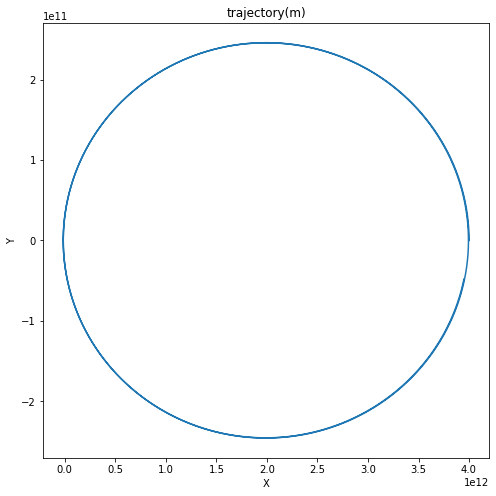

In [56]:
plt.figure(figsize=(8,8))
plt.plot(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title('trajectory(m)')

#a h of 25000 is giving good results

In [67]:
def RK_4_A(x, t, func, h, err):
    f=func(x,t)
    #calculate x1:
    x1=x+2*h*f
    #calculate x2:
    x2i=x+h*f
    f1=func(x2i,t)
    x2=x2i+h*f1
    
    x1m=np.dot(x1,x1)
    x2m=np.dot(x2,x2)

    rho=30*h*err/np.abs(x1m-x2m)
    h_d=h*rho**0.25
    h=h_d
    
    k1=h*f
    k2=h*func(x+k1/2, t+h/2)
    k3=h*func(x+k2/2, t+h/2)
    k4=h*func(x+k3, t+h)
    x= x + (k1+2*k2+2*k3+k4)/6
    t= t + h
    return [x,t]
    

In [ ]:
G=6.67e-11
M=1.9891e30
x=4e12
y=0
vx=0
vy=500
t=0
h=25000
err=1e3/(365*24*3600)
time=[]
X=[x]
Y=[y]
vec=[x,y,vx,vy]

while(t<=3e9):
    vec=RK_4_A(vec, t, func, h, err)[0]
    t=RK_4_A(vec, t, func, h, err)[1]
    X.append(vec[0])
    Y.append(vec[1])
    time.append(t)


In [ ]:
plt.figure(figsize=(8,8))
plt.plot(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title('trajectory(m)')